In [41]:
import matplotlib.pyplot as plt
import numpy as np

def kmeans(points: np.ndarray, num_clusters, num_iterations: int) -> (np.ndarray, np.ndarray):
    """Calculates the KMeans clusters using Euclidean distance for input points."""
    
    num_points, point_dim = points.shape[0], points.shape[-1]
    
    # Initializes centroids as K random points from the input points, with shape [num_clusters, point_dim].
    centroids = points[np.random.choice(num_points, [num_clusters], replace=False)]
    # Augments the input points to shape [num_points, num_clusters, point_dim], for example:
    # [['x1' 'y1'] ['x2' 'y2] ['x3' 'y3']]
    #                   ==>
    #  [[['x1' 'y1'] [['x2' 'y2'] [['x3' 'y3']
    #    ['x1' 'y1']  ['x2' 'y2']  ['x3' 'y3']
    #    ['x1' 'y1']] ['x2' 'y2']] ['x3' 'y3']]]
    # Such that we can take advantage of the vectorized subtraction later.
    points_augmented = np.tile(points.reshape([num_points, 1, point_dim]), [1, num_clusters, 1])
    
    for _ in range(num_iterations):
        # Calculates the element-wise diff of each point to each centroid, for example:
        #  [[['x1' 'y1'] [['x2' 'y2'] [['x3' 'y3']     [[['c1x' 'c1y'] [['c1x' 'c1y'] [['c1x' 'c1y']
        #    ['x1' 'y1']  ['x2' 'y2']  ['x3' 'y3']   -   ['c2x' 'c2y']  ['c2x' 'c2y']  ['c2x' 'c2y']
        #    ['x1' 'y1']] ['x2' 'y2']] ['x3' 'y3']]]     ['c3x' 'c3y']] ['c3x' 'c3y']] ['c3x' 'c3y']]]
        diff = points_augmented - centroids
        # Calculates the Euclidean distance for each point to all centroids.
        dists = np.sqrt(np.sum(diff ** 2, axis=2))
        # Assigns the index of the closest centroid to each point.
        points_cluster = dists.argmin(axis=1)
        
        for k in range(num_clusters):
            # Updates each centroid to be the mean of all points that belong to this cluster.
            centroids[k] = points[points_cluster == k].mean(axis=0)
    
    return points_cluster, centroids
    

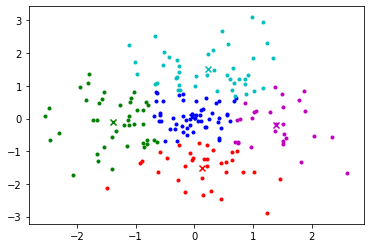

In [43]:
x, k = np.random.normal(size=[200, 2]), 5
clusters, centroids = kmeans(x, k, 10)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(k):
    pts = x[clusters == i]
    # Plots the clustered points.
    plt.scatter(pts[:, 0], pts[:, 1], c=colors[i], marker='.')
    # Plots the centroid.
    plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i], marker='x')
plt.show()